In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Alcuni dati su treni e pendolari in Lombardia
Alcuni punti chiave da sviluppare sono:
- **Numero di pendolari** e **direzione degli spostamenti** (immagino verso Milano);
- **Puntualità** dei trasporti;
- **Frequenza** delle corse;
- **Costo medio** per biglietto e abbonamento;
- **Soddisfazione** dei viaggiatori (se trovo il dato, ma non credo sia facile. Magari si trova qualche articolo o lamentela);
- **Affidabilità** dei viaggi, ovvero numero di cancellazioni o ritardi superiori ai 15 minuti.

In [76]:
file_path_lombardia = 'dataset/datiTreniLombardia.csv'
data_lombardia = pd.read_csv(file_path_lombardia, sep=',', decimal='.')

data_lombardia.head()


,Campagna,Codice stazione,Codice aziendale,Reg,Prov,Stazione,Cod Istat,Comune,Linea fisica,Saliti24H,...,Saliti_RE,Corse_S,Corse_R,Corse_RE,Tipo giorno,Anno,Calendario,Location,POINT_X,POINT_Y
0,c_maggio2024,-,-,EM,-,-,-,-,-,1360,...,0,0,134,0,Feriale,2024,invernale (mag),0,0.000000,0.00000
1,c_maggio2024,-,-,PI,-,-,-,-,-,4330,...,2900,0,217,84,Feriale,2024,invernale (mag),0,0.000000,0.00000
2,c_maggio2024,-,-,VE,-,-,-,-,-,6640,...,6640,0,0,33,Feriale,2024,invernale (mag),0,0.000000,0.00000
3,c_maggio2024,-,-,ZZ,-,-,-,-,-,1320,...,0,44,0,0,Feriale,2024,invernale (mag),0,0.000000,0.00000
4,c_maggio2024,146,S01416,LO,LC,ABBADIA LARIANA,97001,Abbadia Lariana,TIRANO-MILANO Lc-So,190,...,30,0,26,1,Feriale,2024,invernale (mag),POINT (9.335204987 45.895939932),9.335205,45.89594


In [77]:
data_lo = data_lombardia[data_lombardia['Reg'] == 'LO']

grouped_data_lo = data_lo.groupby('Prov')['Saliti24H'].sum().reset_index()

print(grouped_data_lo)

   Prov  Saliti24H
0    BG      33780
1    BS      33350
2    CO      36740
3    CR       7830
4    LC      30800
5    LO      11890
6    MI     432990
7    MN       1000
8    PV      26420
9    SO       5930
10   VA      81750


   Prov  Saliti24H
6    MI     432990
10   VA      81750
2    CO      36740
0    BG      33780
1    BS      33350
4    LC      30800
8    PV      26420
5    LO      11890
3    CR       7830
9    SO       5930
7    MN       1000


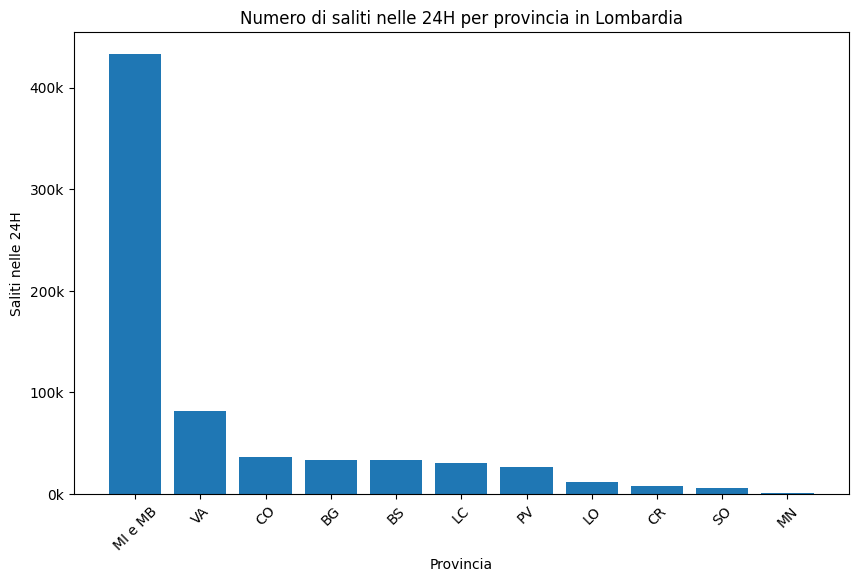

In [78]:
grouped_data_lo_sorted = grouped_data_lo.sort_values(by='Saliti24H', ascending=False)

print(grouped_data_lo_sorted)
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_lo_sorted['Prov'], grouped_data_lo_sorted['Saliti24H'])
plt.xlabel('Provincia')
plt.ylabel('Saliti nelle 24H')
plt.title('Numero di saliti nelle 24H per provincia in Lombardia')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
# Modifica i dati nell'asse delle x
x_labels = grouped_data_lo_sorted['Prov'].replace('MI', 'MI e MB')
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)
plt.show()


In [79]:
grouped_data_lo_province = data_lo.groupby('Prov')[['Saliti24H', 'Discesi7-9', 'Saliti7-9', 'Corse7-9', 'Corse24H']].sum().reset_index()

grouped_data_lo_province['Saliti_per_ora'] = grouped_data_lo_province['Saliti24H'] / 24
grouped_data_lo_province['Discesi_per_ora'] = grouped_data_lo_province['Discesi7-9'] / 3  

grouped_data_lo_province_day_type = data_lo.groupby(['Prov', 'Tipo giorno'])[['Saliti24H', 'Discesi7-9']].sum().reset_index()

grouped_data_lo_province_day_type['Saliti_per_ora'] = grouped_data_lo_province_day_type['Saliti24H'] / 24
grouped_data_lo_province_day_type['Discesi_per_ora'] = grouped_data_lo_province_day_type['Discesi7-9'] / 3 

print(grouped_data_lo_province_day_type)
print(grouped_data_lo_province)

   Prov Tipo giorno  Saliti24H  Discesi7-9  Saliti_per_ora  Discesi_per_ora
0    BG     Feriale      33780        6090     1407.500000      2030.000000
1    BS     Feriale      33350        6020     1389.583333      2006.666667
2    CO     Feriale      36740        5940     1530.833333      1980.000000
3    CR     Feriale       7830        1640      326.250000       546.666667
4    LC     Feriale      30800        5290     1283.333333      1763.333333
5    LO     Feriale      11890        2000      495.416667       666.666667
6    MI     Feriale     432990      114240    18041.250000     38080.000000
7    MN     Feriale       1000         140       41.666667        46.666667
8    PV     Feriale      26420        5090     1100.833333      1696.666667
9    SO     Feriale       5930        1660      247.083333       553.333333
10   VA     Feriale      81750       15000     3406.250000      5000.000000
   Prov  Saliti24H  Discesi7-9  Saliti7-9  Corse7-9  Corse24H  Saliti_per_ora  \
0    BG

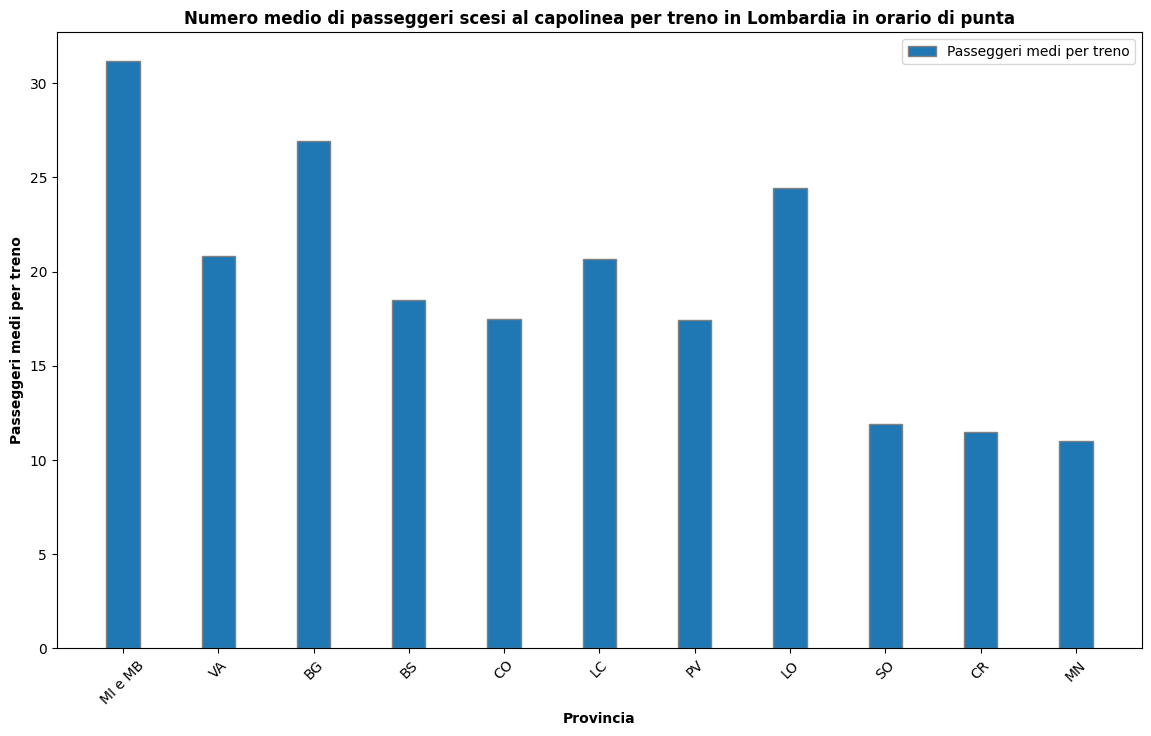

In [80]:
grouped_data_lo_province_sorted = grouped_data_lo_province.sort_values(by='Discesi7-9', ascending=False)
grouped_data_lo_province_sorted['Avg_Passengers_per_Train'] = grouped_data_lo_province_sorted['Saliti24H'] / grouped_data_lo_province_sorted['Corse24H']

bar_width = 0.35

r1 = np.arange(len(grouped_data_lo_province_sorted))

plt.figure(figsize=(14, 8))
plt.bar(r1, grouped_data_lo_province_sorted['Avg_Passengers_per_Train'], width=bar_width, edgecolor='grey', label='Passeggeri medi per treno')

plt.xlabel('Provincia', fontweight='bold')
plt.ylabel('Passeggeri medi per treno', fontweight='bold')
plt.title('Numero medio di passeggeri scesi al capolinea per treno in Lombardia in orario di punta', fontweight='bold')

x_labels = grouped_data_lo_province_sorted['Prov'].replace('MI', 'MI e MB')
plt.xticks(r1, x_labels, rotation=45)

plt.legend()
plt.show()

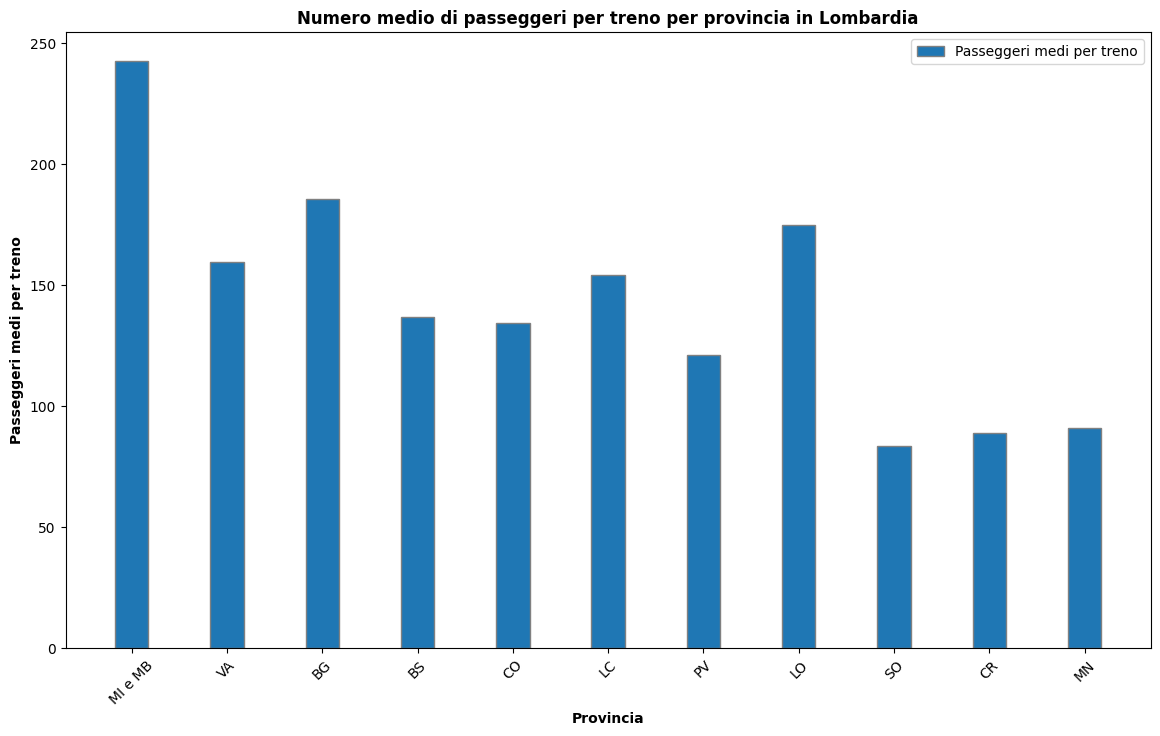

In [81]:
grouped_data_lo_province_sorted = grouped_data_lo_province.sort_values(by='Discesi7-9', ascending=False)
grouped_data_lo_province_sorted['Avg_Passengers_per_Train'] = grouped_data_lo_province_sorted['Saliti24H'] / grouped_data_lo_province_sorted['Corse7-9']

bar_width = 0.35

r1 = np.arange(len(grouped_data_lo_province_sorted))

plt.figure(figsize=(14, 8))
plt.bar(r1, grouped_data_lo_province_sorted['Avg_Passengers_per_Train'], width=bar_width, edgecolor='grey', label='Passeggeri medi per treno')

plt.xlabel('Provincia', fontweight='bold')
plt.ylabel('Passeggeri medi per treno', fontweight='bold')
plt.title('Numero medio di passeggeri per treno per provincia in Lombardia', fontweight='bold')

x_labels = grouped_data_lo_province_sorted['Prov'].replace('MI', 'MI e MB')
plt.xticks(r1, x_labels, rotation=45)

plt.legend()
plt.show()

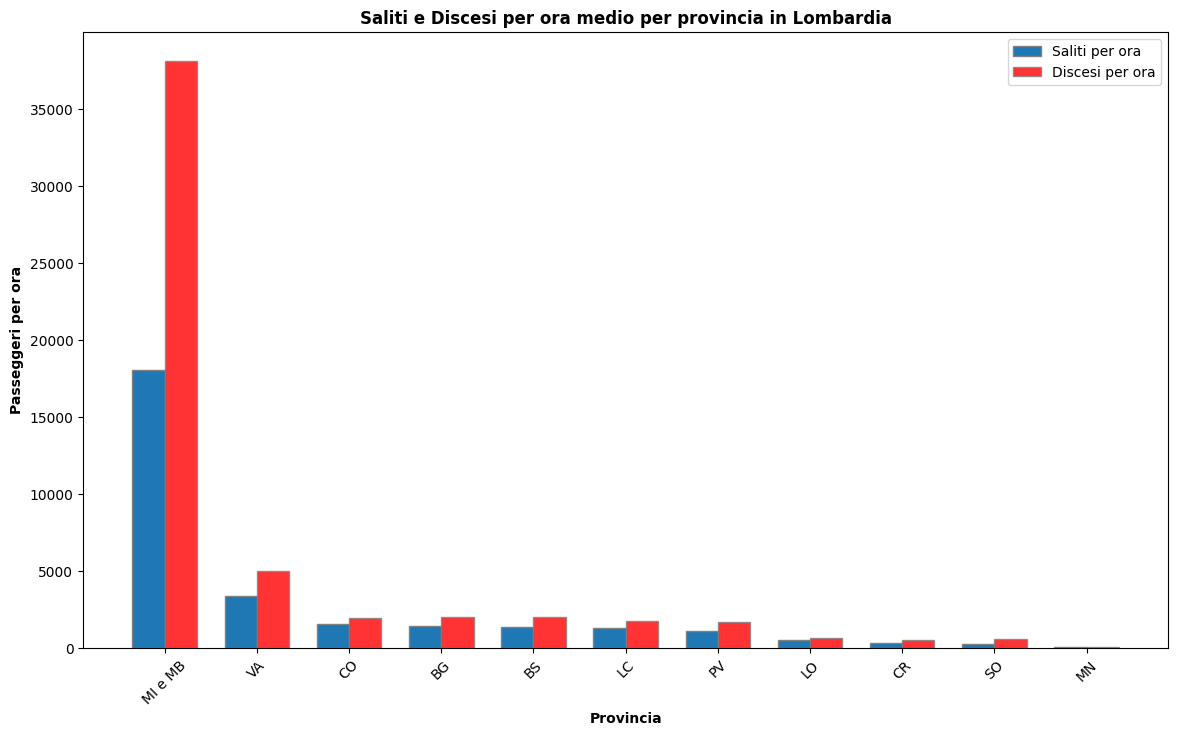

In [82]:
grouped_data_lo_province_sorted = grouped_data_lo_province.sort_values(by='Saliti_per_ora', ascending=False)

bar_width = 0.35

r1 = np.arange(len(grouped_data_lo_province_sorted))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 8))
plt.bar(r1, grouped_data_lo_province_sorted['Saliti_per_ora'], width=bar_width, edgecolor='grey', label='Saliti per ora')
plt.bar(r2, grouped_data_lo_province_sorted['Discesi_per_ora'], color='r', alpha=0.8, width=bar_width, edgecolor='grey', label='Discesi per ora')

plt.xlabel('Provincia', fontweight='bold')
plt.ylabel('Passeggeri per ora', fontweight='bold')
plt.title('Saliti e Discesi per ora medio per provincia in Lombardia', fontweight='bold')

x_labels = grouped_data_lo_province_sorted['Prov'].replace('MI', 'MI e MB')
plt.xticks([r + bar_width/2 for r in range(len(grouped_data_lo_province_sorted))], x_labels, rotation=45)

plt.legend()
plt.show()

In [83]:
file_path_ritardi = 'dataset/ritardiItalia.csv'
data_ritardi = pd.read_csv(file_path_ritardi, sep=',', decimal='.')

ndas = data_ritardi['train_arrival_stop_name']

dd = data_lombardia['Stazione']
fermate_comuni = pd.merge(dd.drop_duplicates(), ndas.drop_duplicates(), left_on='Stazione', right_on='train_arrival_stop_name', how='left')
fermate_comuni.to_csv('fermate_comuni.csv', index=True)

In [84]:
fermate_comuni = pd.merge(data_lombardia, data_ritardi, left_on='Stazione', right_on='train_arrival_stop_name')

fermate_comuni_mean = fermate_comuni.groupby('Stazione').agg({
	'Saliti24H': 'mean',
	'avg_arrival_delay': 'mean',
	'POINT_X': 'first',
	'POINT_Y': 'first'
}).reset_index()

print(fermate_comuni_mean[['Stazione', 'Saliti24H', 'avg_arrival_delay', 'POINT_X', 'POINT_Y']])


                Stazione  Saliti24H  avg_arrival_delay    POINT_X    POINT_Y
0                  ARONA     1320.0           3.613431   8.559108   4.575531
1                BERGAMO    10170.0           2.923070   9.675111  45.690344
2                 BESANA      560.0           1.877882   0.928291  45.702902
3                BRESCIA    11880.0           2.973620  10.212859   4.553239
4          BUSTO ARSIZIO     4930.0           2.183451   8.865064  45.616238
5         CARNATE USMATE     4490.0           3.765856   9.375117  45.653150
6                CHIASSO     5640.0           2.380999   9.031333   4.583194
7              CHIAVENNA      500.0           2.210379   0.940716  46.321335
8                CODOGNO     2280.0           4.367855   9.701406  45.154979
9                 COLICO     1550.0           2.096147   9.375256  46.138093
10         COSTA MASNAGA      360.0           1.383788   0.928526  45.763506
11               CREMONA     2800.0           3.969900  10.017983  45.143301

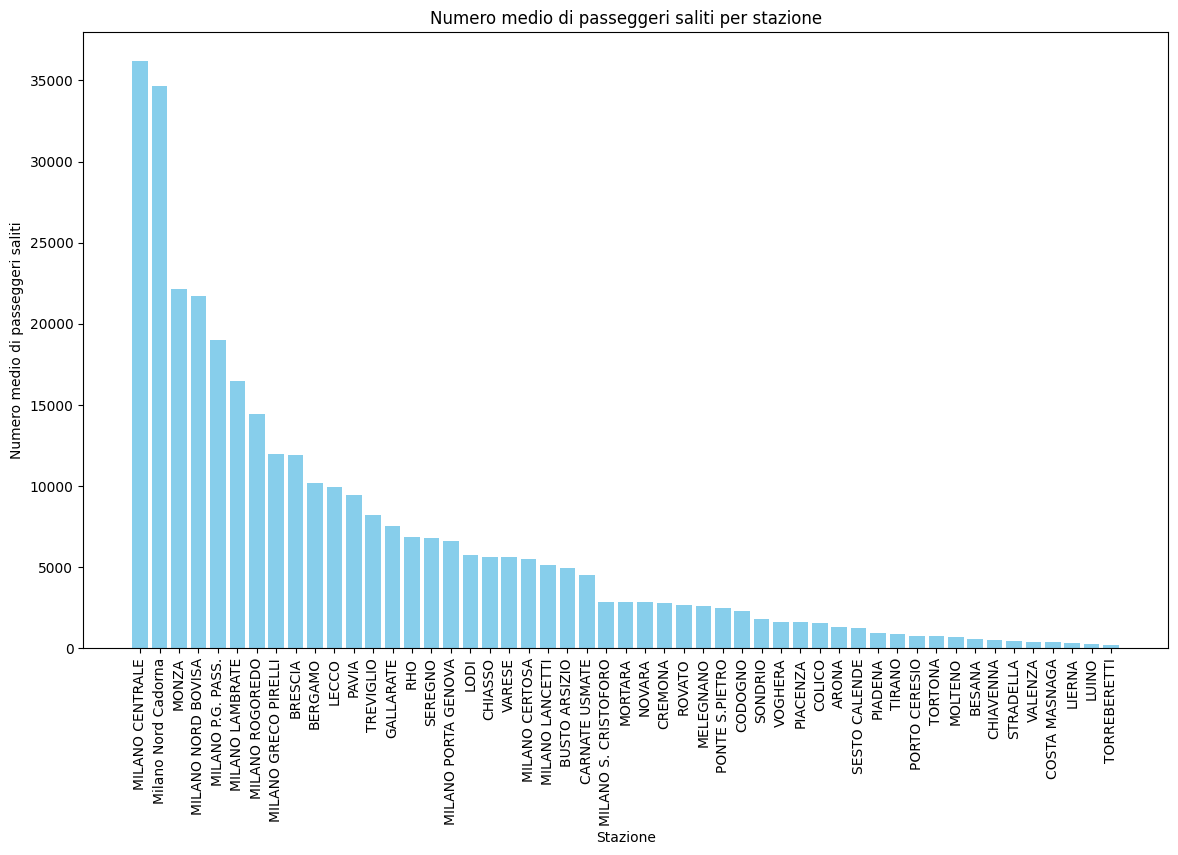

/var/folders/l_/g9z6nmyj7zq9g1y79tdg1q380000gn/T/ipykernel_98229/840909488.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



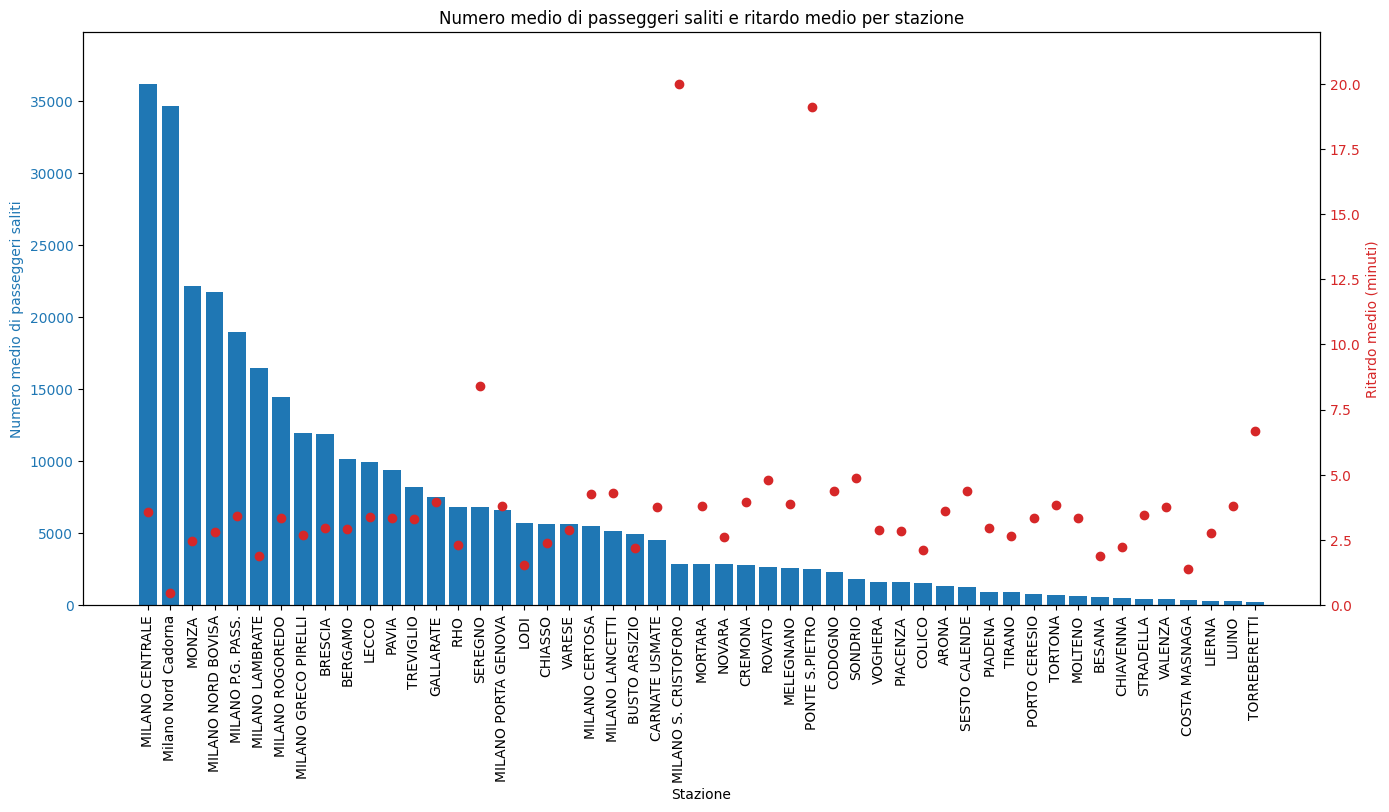

In [85]:

fermate_comuni_mean_sorted = fermate_comuni_mean.sort_values(by='Saliti24H', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['Saliti24H'], color='skyblue')
plt.xlabel('Stazione')
plt.ylabel('Numero medio di passeggeri saliti')
plt.title('Numero medio di passeggeri saliti per stazione')
plt.xticks(rotation=90)
plt.show()

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Stazione')
ax1.set_ylabel('Numero medio di passeggeri saliti', color=color)
ax1.bar(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['Saliti24H'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(fermate_comuni_mean_sorted['Stazione'], rotation=90)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Ritardo medio (minuti)', color=color)
ax2.scatter(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['avg_arrival_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ensure the y-axes are aligned
ax1.set_ylim(0, max(fermate_comuni_mean_sorted['Saliti24H']) * 1.1)
ax2.set_ylim(0, max(fermate_comuni_mean_sorted['avg_arrival_delay']) * 1.1)

fig.tight_layout()  
plt.title('Numero medio di passeggeri saliti e ritardo medio per stazione')
plt.show()

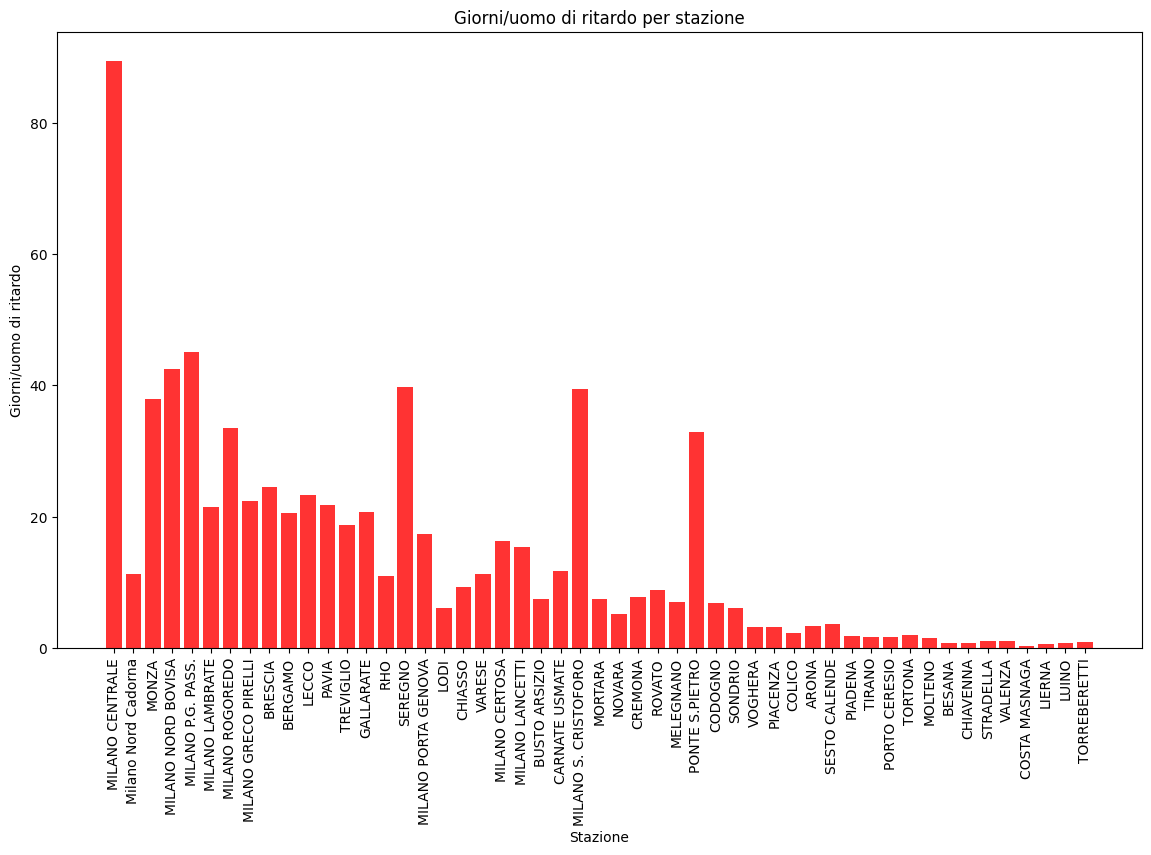

In [86]:
fermate_comuni_mean_sorted['Total_Delay_Minutes'] = (fermate_comuni_mean_sorted['avg_arrival_delay'] * fermate_comuni_mean_sorted['Saliti24H']) / (60 * 24)

plt.figure(figsize=(14, 8))
plt.bar(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['Total_Delay_Minutes'], color='red', alpha=0.8)
plt.xlabel('Stazione')
plt.ylabel('Giorni/uomo di ritardo')
plt.title('Giorni/uomo di ritardo per stazione')
plt.xticks(rotation=90)
plt.show()


In [87]:
linea_con_piu_passeggeri = data_lombardia.groupby('Linea fisica')['Saliti24H'].sum().reset_index()
linea_con_piu_passeggeri_sorted = linea_con_piu_passeggeri.sort_values(by='Saliti24H', ascending=False)

print(linea_con_piu_passeggeri_sorted.head(1))

                 Linea fisica  Saliti24H
25  Milano Nord Cadorna - Sar      96030


In [88]:
px.colors.named_colorscales()
color_continuous_scale = px.colors.sequential.Viridis
fig = px.density_mapbox(
    fermate_comuni_mean, 
    lat='POINT_Y', 
    lon='POINT_X', 
    z='avg_arrival_delay',
    radius=35, 
    center=dict(lat=45.47061844608548, lon=9.181520912266429),
    zoom=8,
    mapbox_style='open-street-map',
    height=800,
    labels={'avg_arrival_delay': 'ritardo medio in minuti'}
)
fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Ritardo medio: %{z:.2f} minuti<extra></extra>', customdata=fermate_comuni_mean[['Stazione']].values)
fig.update_layout(title='Mappa della densità del ritardo medio di arrivo per stazione in Lombardia')
fig.show()


## Mappa analoga per la frequenza delle stazioni

In [89]:
px.colors.named_colorscales()
color_continuous_scale=px.colors.sequential.Viridis
fig = px.density_mapbox(
    fermate_comuni_mean, 
    lat='POINT_Y', 
    lon='POINT_X', 
    z='Saliti24H',
    radius=35, 
    center=dict(lat=45.47061844608548, lon=9.181520912266429),
    zoom=8,
    mapbox_style='open-street-map',
    height=800,
    labels={'Saliti24H': 'passeggeri saliti in 24 ore'}

)
fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Passeggeri saliti in 24 ore: %{z:.i} <extra></extra>', customdata=fermate_comuni_mean[['Stazione']].values)
fig.update_layout(title='Frequenza treni per stazione in Lombardia')
fig.show()
